In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
import wrangle
import env

Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

1.  Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

### Hypothesis
- null hypothesis = "Customer tenure is independent from monthly_charges"
- alternative_hypothesis = "Customer tenure and monthly_charges are not independent"

In [2]:
df = wrangle.wrangle_telco()
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [3]:
df.shape

(1695, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 66.2+ KB


In [5]:
train, validate, test = wrangle.telco_split_continuous(df)

In [6]:
train.shape, validate.shape, test.shape

((949, 4), (407, 4), (339, 4))

In [7]:
# train = train.set_index("customer_id")
# validate = validate.set_index("customer_id")
# test = test.set_index("customer_id")

In [8]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
577,3508-VLHCZ,90.55,71,6239.05
1577,9337-SRRNI,25.30,66,1673.80
1647,9715-WZCLW,97.20,71,6910.30
1692,9975-GPKZU,19.75,46,856.50
1595,9430-NKQLY,25.10,72,1790.80


In [9]:
df_corr = train.drop(columns=['customer_id']).corr()
df_corr

,monthly_charges,tenure,total_charges
monthly_charges,1.000000,0.424435,0.942909
tenure,0.424435,1.000000,0.644626
total_charges,0.942909,0.644626,1.000000


(0.0, 4.0)

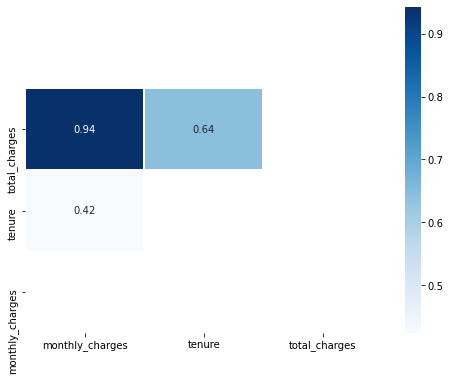

In [10]:
# heatmap for each correlation coefficients for a dataset

plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='Blues', annot=True, linewidth=0.5, mask= np.triu(df_corr))
plt.ylim(0, 4)

In [11]:
# Use a scipy stats function pearsonr to calculate the correlation coefficient and the p-value.

r, p_value = pearsonr(train.total_charges, train.monthly_charges)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.9429093215112994
P-value: 0.0


In [12]:
# Since my variables are not normally distributed, I might choose Spearman instead.

exam_spearman = train.drop(columns=['customer_id']).corr(method='spearman')
exam_spearman

,monthly_charges,tenure,total_charges
monthly_charges,1.000000,0.449620,0.916919
tenure,0.449620,1.000000,0.708126
total_charges,0.916919,0.708126,1.000000


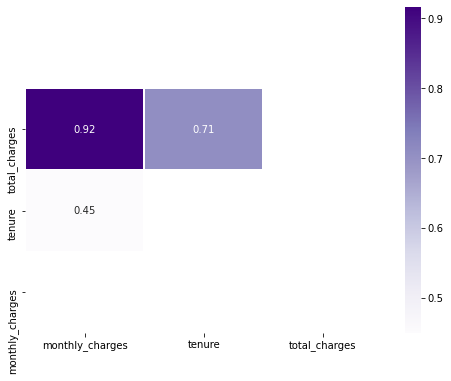

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(exam_spearman, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(df_corr))
plt.ylim(0, 4)

plt.show()

In [14]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = spearmanr(train.total_charges, train.monthly_charges)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.9169193454476512
P-value: 0.0


2.  Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [15]:
def plot_variable_pairs(df):
    # Scatterplot of the two continuous variables 'tenure' and 'total_charges'
    sns.relplot(x="tenure", y="total_charges", data=train)
    # Simple scatter plot with a regression line
    sns.lmplot(x="tenure", y="total_charges", data=train, line_kws={'color': 'red'})
    # use a jointplot() with kind=reg to view individual variable 
    # distributions for our x and y along with a scatter plot with
    # regression line
    sns.jointplot(x="tenure", y="total_charges", data=train,  kind='reg', height=5)
    # use sns.pairplot() to view a scatter plot visualizing the relationships
    # between all of the numeric columns in our dataset all at once as well as 
    # individual distributions for each individual column
    sns.pairplot(train[['tenure', 'total_charges', 'monthly_charges']], corner=True)
    plt.show()

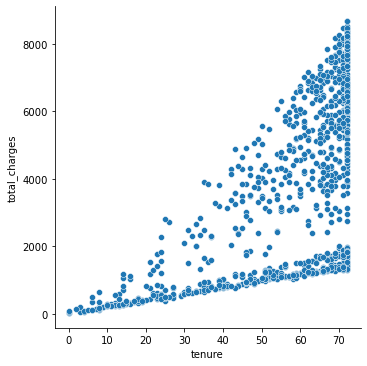

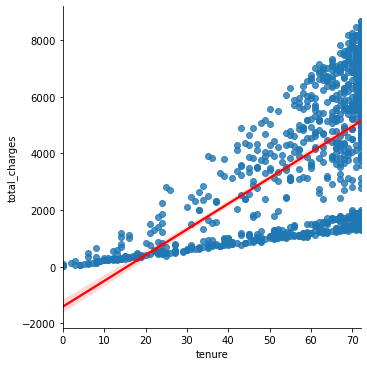

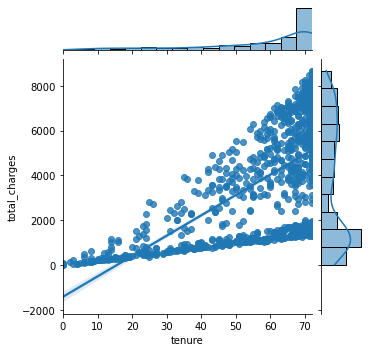

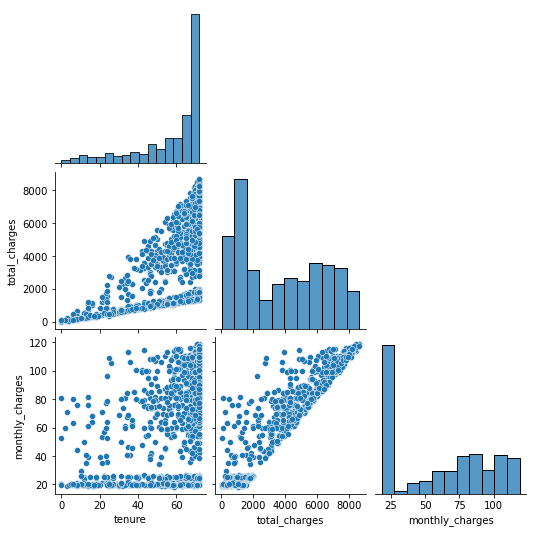

None


In [16]:
print(plot_variable_pairs(train))

3.  Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [17]:
def months_to_years(df):
    '''
    This function will take the tenure months and transform them to full years
    '''
    df['tenure_years'] = (df.tenure/12).astype(int)
    return df

In [18]:
months_to_years(train)
train.head()

,customer_id,monthly_charges,tenure,total_charges,tenure_years
577,3508-VLHCZ,90.55,71,6239.05,5
1577,9337-SRRNI,25.30,66,1673.80,5
1647,9715-WZCLW,97.20,71,6910.30,5
1692,9975-GPKZU,19.75,46,856.50,3
1595,9430-NKQLY,25.10,72,1790.80,6


4.  Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [19]:
def plot_categorical_and_continuous_vars(df):
    '''
    returning the train dataframe with all columns which will hold the 
    continuous and categorical features and output 3 different plots for 
    visualizing a categorical variable and continuous variable
    '''
    #Swarm plot discrete with continuous
    sns.swarmplot(x='tenure_years', y='monthly_charges', data=train)
    plt.show()
    sns.stripplot(x='tenure_years', y='monthly_charges', data=train)
    plt.show()
    sns.boxplot(x='tenure_years', y='monthly_charges', data=train)
    plt.show()
    sns.barplot(x='tenure_years', y='monthly_charges', data=train)
    plt.show()

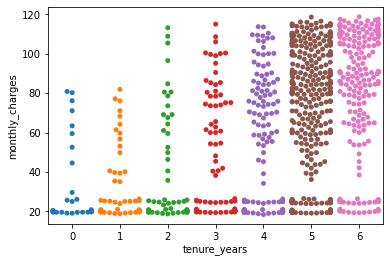

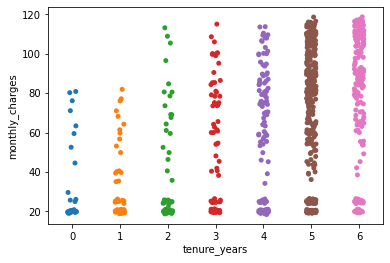

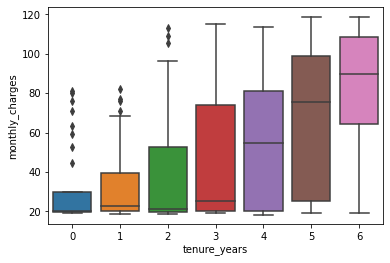

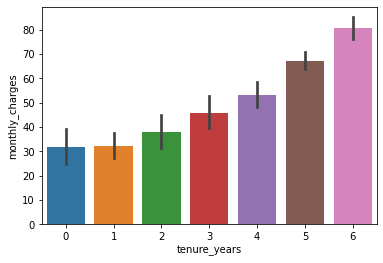

None


In [20]:
print(plot_categorical_and_continuous_vars(df))

5.  Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [21]:
import explore

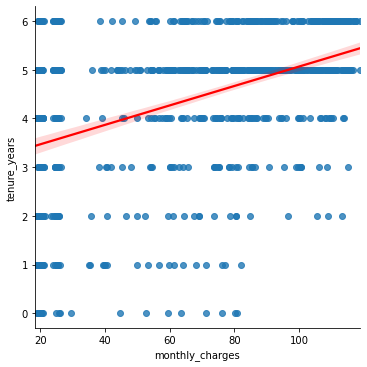

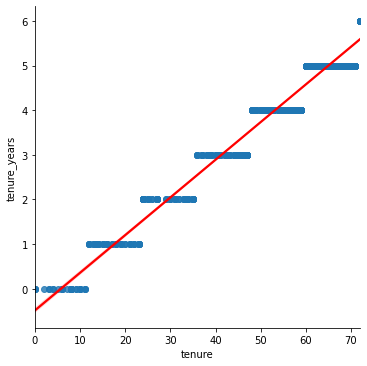

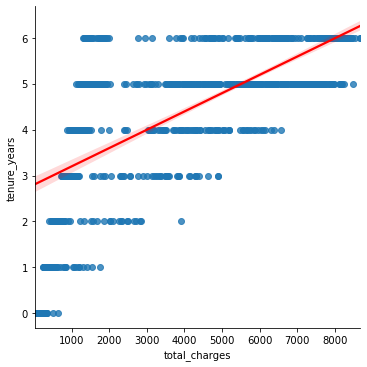

In [22]:
explore.plot_variable_pairs(train, 'tenure_years')

6.  Explore your dataset with any other visualizations you think will be helpful.

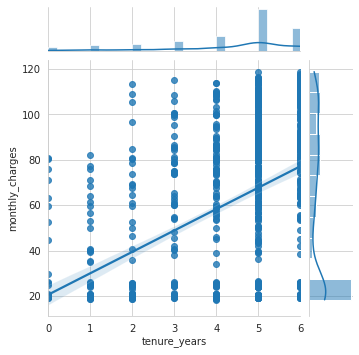

In [23]:
with sns.axes_style('whitegrid'):
    j = sns.jointplot(x="tenure_years", y="monthly_charges", data=train,  kind='reg', height=5);
plt.show()

7.  In a seperate notebook, use the functions you have developed in this exercise with the mall customers dataset.